In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

%matplotlib inline

In [360]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [361]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [363]:
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


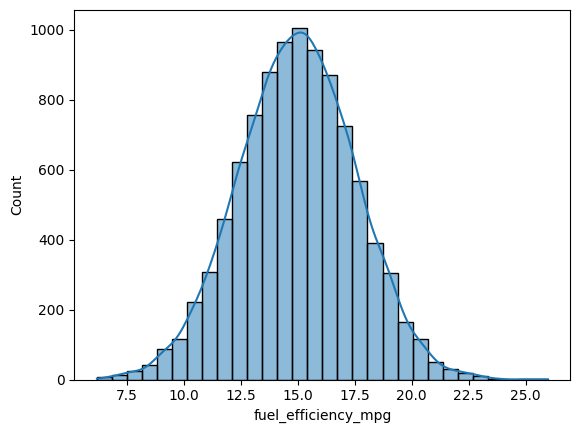

In [364]:
sns.histplot(df['fuel_efficiency_mpg'], bins=30, kde=True)
plt.show()

## Question 1.

In [365]:
# There's one column with missing values. What is it?
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2.

In [366]:
# What's the median (50% percentile) for variable 'horsepower'?
horsepower_median = df['horsepower'].median()
horsepower_median

149.0

## Prepare and split the dataset


In [367]:
# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
9699,210,163.0,1972.029124,2011,19.961672
9700,160,126.0,3011.588014,2009,14.651056
9701,290,187.0,2440.508039,2019,18.404435
9702,260,129.0,1865.404480,2019,20.502460


In [368]:
shuffled_df.shape

(9704, 5)

In [369]:
# train-test-split
n = len(df)

n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

# Split into train/val/test
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [370]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

## Question 3.
### OPTION 1: Fill missing values with 0 

In [371]:
col = 'horsepower'

In [372]:
horsepower_median = df['horsepower'].fillna(0)
horsepower_median.head()

0    159.0
1     97.0
2     78.0
3      0.0
4    140.0
Name: horsepower, dtype: float64

In [373]:
horsepower_median = df['horsepower'].mean()
horsepower_median

np.float64(149.65729212983547)

In [374]:
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()

df_train_0[col] = df_train_0[col].fillna(0)
df_val_0[col] = df_val_0[col].fillna(0)

In [375]:
# Separate features and target
X_train_0 = df_train_0.drop('fuel_efficiency_mpg', axis=1)
y_train_0 = df_train_0['fuel_efficiency_mpg']
X_val_0 = df_val_0.drop('fuel_efficiency_mpg', axis=1)
y_val_0 = df_val_0['fuel_efficiency_mpg']

In [376]:
# Train model
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [377]:
# Predict and calculate RMSE
pred_0 = model_0.predict(X_val_0)
rmse_0 = round(np.sqrt(mean_squared_error(y_val_0, pred_0)), 2)

### OPTION 2: Fill missing values with Mean

In [378]:
mean_value = df_train[col].mean()

In [379]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

df_train_mean[col] = df_train_mean[col].fillna(mean_value)
df_val_mean[col] = df_val_mean[col].fillna(mean_value)

In [380]:
# Separate features and target
X_train_mean = df_train_mean.drop('fuel_efficiency_mpg', axis=1)
y_train_mean = df_train_mean['fuel_efficiency_mpg']
X_val_mean = df_val_mean.drop('fuel_efficiency_mpg', axis=1)
y_val_mean = df_val_mean['fuel_efficiency_mpg']


In [381]:
# Train model
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [382]:
# Predict and calculate RMSE
pred_mean = model_mean.predict(X_val_mean)
rmse_mean = round(np.sqrt(mean_squared_error(y_val_mean, pred_mean)), 2)

In [383]:
# Compare Results 
print("RMSE with 0:", rmse_0)
print("RMSE with mean:", rmse_mean)


RMSE with 0: 0.52
RMSE with mean: 0.46


In [384]:
if rmse_0 < rmse_mean:
    print("✅ Better option: With 0")
elif rmse_mean < rmse_0:
    print("✅ Better option: With mean")
else:
    print("✅ Both are equally good")

✅ Better option: With mean


## Question 4.

In [385]:
# Fill NAs with 0
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()
df_train_0[col] = df_train_0[col].fillna(0)
df_val_0[col] = df_val_0[col].fillna(0)

In [386]:
# Separate features and target
X_train = df_train_0.drop('fuel_efficiency_mpg', axis=1)
y_train = df_train_0['fuel_efficiency_mpg']
X_val = df_val_0.drop('fuel_efficiency_mpg', axis=1)
y_val = df_val_0['fuel_efficiency_mpg']

In [387]:
# List of regularization strengths (r values)
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]


In [388]:
# Store RMSE for each r
results = {}

In [389]:
for r in r_values:
    model = Ridge(alpha=r)   # alpha = regularization strength
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = round(np.sqrt(mean_squared_error(y_val, preds)), 2)
    results[r] = rmse


In [390]:
# Print all RMSE scores
for r, rmse in results.items():
    print(f"r={r}: RMSE={rmse}")

r=0: RMSE=0.52
r=0.01: RMSE=0.52
r=0.1: RMSE=0.52
r=1: RMSE=0.52
r=5: RMSE=0.52
r=10: RMSE=0.52
r=100: RMSE=0.52


In [391]:
# Find best r (lowest RMSE, smallest r if tie)
best_r = min(results, key=lambda x: (results[x], x))
print(f"\n✅ Best r: {best_r}")


✅ Best r: 0


## Question 5.

In [392]:
# --- Step 1: Prepare data ---
# (Assuming your DataFrame is called df and target is 'fuel_efficiency_mpg')
df = df.copy()
df = df.fillna(0)  # Fill missing values with 0

In [393]:
X = df.drop('fuel_efficiency_mpg', axis=1)
y = df['fuel_efficiency_mpg']

In [394]:
# --- Step 2: Function for RMSE ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [395]:
# --- Step 3: Try different random seeds ---
rmse_scores = []

for seed in range(10):  # seeds [0–9]
    # Split 60% / 20% / 20%
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Validate
    preds = model.predict(X_val)
    score = rmse(y_val, preds)
    rmse_scores.append(score)


In [396]:
std_value = np.std(rmse_scores)
print("All RMSE scores:", [round(s, 3) for s in rmse_scores])
print("Standard deviation of RMSE scores:", round(std_value, 3))

All RMSE scores: [np.float64(0.518), np.float64(0.517), np.float64(0.52), np.float64(0.522), np.float64(0.511), np.float64(0.515), np.float64(0.515), np.float64(0.536), np.float64(0.519), np.float64(0.52)]
Standard deviation of RMSE scores: 0.006


## Question 6.


In [397]:
# --- Step 1: Prepare data ---
df = df.copy()

In [398]:
# Split features and target
X = df.drop('fuel_efficiency_mpg', axis=1)
y = df['fuel_efficiency_mpg']


In [399]:
# --- Step 2: Split dataset using seed=9 ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=9)

In [400]:
# --- Step 3: Combine train and validation sets ---
X_full_train = pd.concat([X_train, X_val]).reset_index(drop=True)
y_full_train = pd.concat([y_train, y_val]).reset_index(drop=True)

In [401]:
# --- Step 4: Fill missing values with 0 ---
X_full_train = X_full_train.fillna(0)
X_test = X_test.fillna(0)


In [402]:
# --- Step 5: Train Ridge Regression with r = 0.001 ---
model = Ridge(alpha=0.001)
model.fit(X_full_train, y_full_train)


,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [403]:
# --- Step 6: Evaluate on test set ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE on test dataset:", round(rmse, 3))

RMSE on test dataset: 0.521
